In [1]:
# modules

import numpy as np
import matplotlib.pyplot as plt

 # Task 1

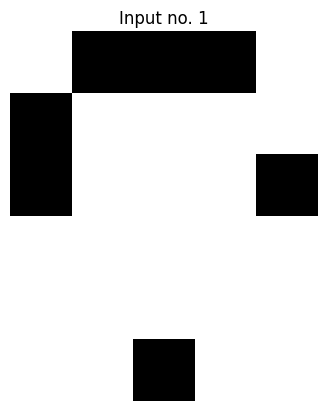

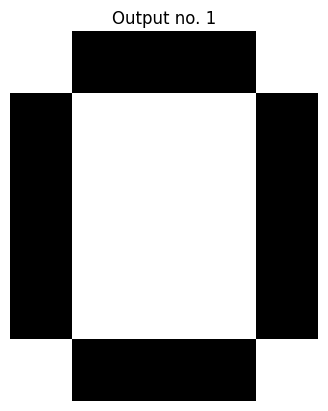

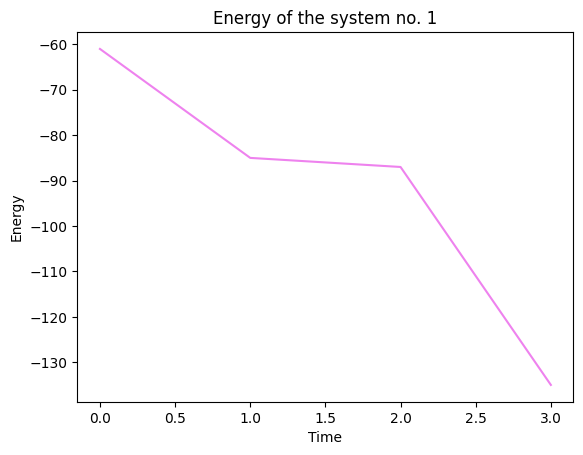

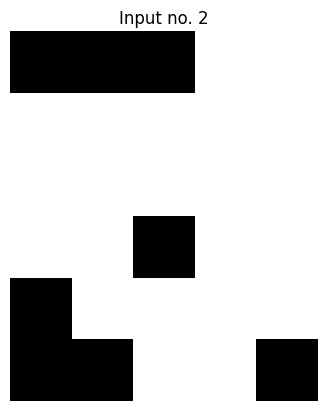

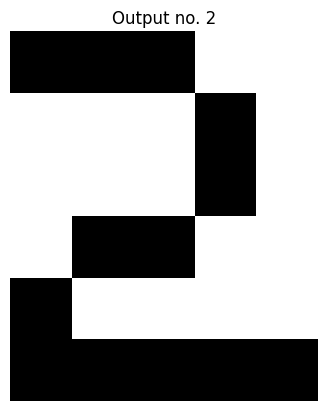

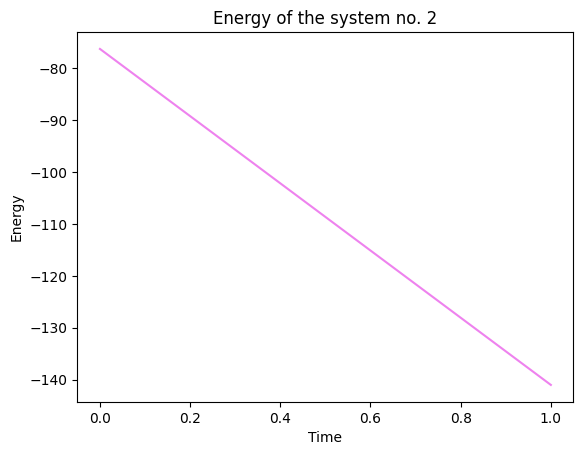

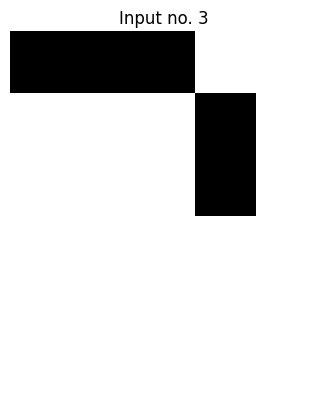

The input does NOT converge. Printed output is not stable.


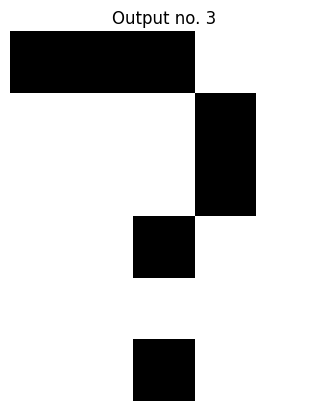

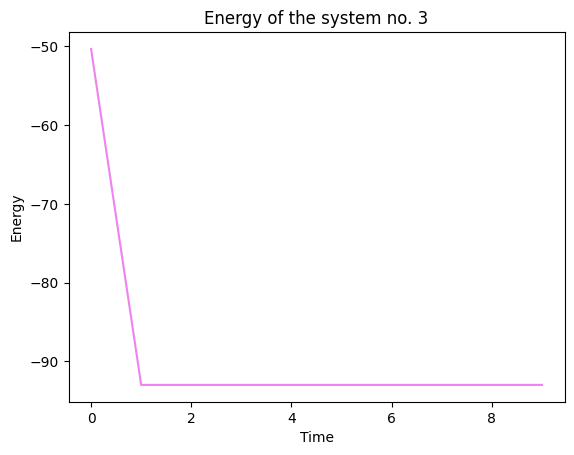

In [56]:
def draw_image(input, if_title = False, title = "Default title"):

    input = np.reshape(input, [6, 5])
    plt.imshow(input, cmap = "gray_r")
    plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False)
    plt.axis("off")
    if if_title:
        plt.title(title)
    plt.show()

# define training data

zero = np.array([-1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1])

one = np.array([-1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1])

two = np.array([1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1])

# define test data

noisy1 = np.array([-1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1])

noisy2 = np.array([1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1])

noisy3 = np.array([1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1 ,-1 ,-1, -1, -1, -1, -1, -1, -1])

# now we define function making a weight out of training data

def tensor_with_itself(input):

    weight = np.empty([len(input), len(input)])
    for row in range(len(input)):
        for col in range(len(input)):
            weight[row, col] = input[row]*input[col]

    return weight

# define matrix multiplication [NOT USED]

def multiply(matrix, vector):

    output = np.empty(len(vector))

    for row in range(len(vector)):

        sum = 0
        for col in range(len(vector)):
            sum += matrix[row, col] * vector[col]

        output[row] = sum

    return output

# the particular weight matrix in our case

the_weight = (tensor_with_itself(zero) + tensor_with_itself(one) + tensor_with_itself(two))/3 - np.identity(30)

def forward(input):

    return np.array(np.sign(np.matmul(the_weight, input)))

# energy function

def energy(input):
    x = np.matmul(the_weight, input)
    return -0.5*(np.matmul(input, x))

# test

for num, input in enumerate([noisy1, noisy2, noisy3]):

    data = input.copy()

    draw_image(data, True, "Input no. {}".format(num + 1))

    conv = False
    energies = []
    for t in range(10):
        energies.append(energy(data))
        new_data = forward(data)
        if np.all(new_data == data):
            conv = True
            break
        data = new_data

    
    if not conv: print("The input does NOT converge. Printed output is not stable.")

    draw_image(data, True, "Output no. {}".format(num + 1))

    plt.plot(range(t + 1), energies, color = "violet")
    plt.xlabel("Time")
    plt.title("Energy of the system no. {}".format(num + 1))
    plt.ylabel("Energy")
    plt.show()

# Task 2

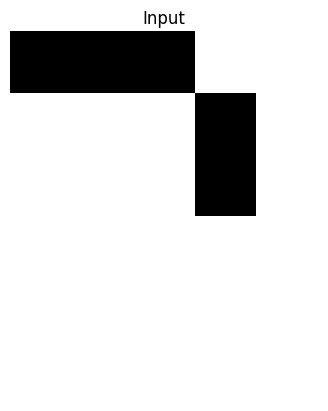

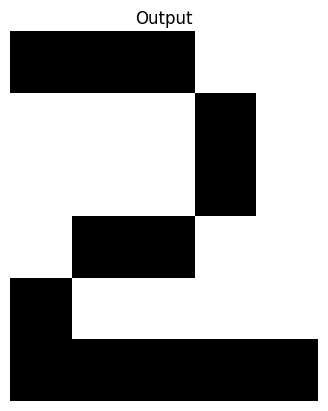

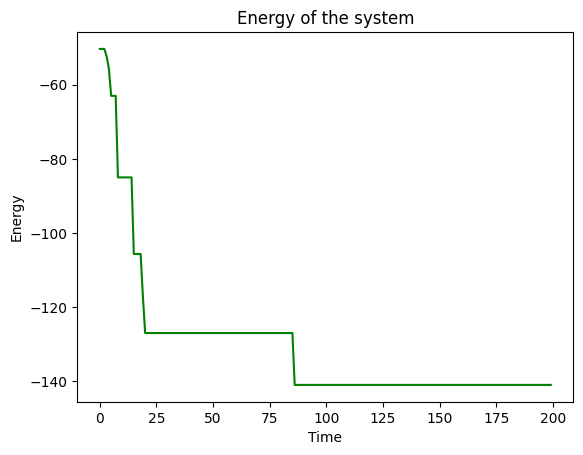

In [132]:
def forward(input):
    new_input = input.copy()
    idx = np.random.choice(range(30), 1)[0]
    new_input[idx] = -new_input[idx]

    if energy(input) > energy(new_input):
        return new_input
    else:
        return input

energies = []
data = noisy3
draw_image(data, True, "Input")
for t in range(200):
    energies.append(energy(data))
    data = forward(data)
draw_image(data, True, "Output")
plt.plot(range(t + 1), energies, color = "green")
plt.xlabel("Time")
plt.title("Energy of the system")
plt.ylabel("Energy")
plt.show()
